# Generate input image - Using Canny Edge Detection

In [1]:
import numpy as np
import cv2 as cv
from os.path import join as path_join
from matplotlib import pyplot as plt

In [2]:
def get_otsu(image):
    image=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    se=cv.getStructuringElement(cv.MORPH_RECT , (8,8))
    bg=cv.morphologyEx(image, cv.MORPH_DILATE, se)
    out_gray=cv.divide(image, bg, scale=255)
    out_binary=cv.threshold(out_gray, 0, 255, cv.THRESH_OTSU )[1] 
    return out_binary


In [3]:
def threshold(img, threshold):
    img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    ret,thresh1 = cv.threshold(img,threshold,255,cv.THRESH_BINARY)
    return thresh1

In [4]:
def fast_nlmean_denoiser(img):
    dst = cv.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    return dst

In [5]:
def extract_borders(file_path: str, apply_denoiser=True):
    img = cv.imread(file_path)
    assert img is not None, "file could not be read, check with os.path.exists()"
    if apply_denoiser:
        img = fast_nlmean_denoiser(img)
    edges = cv.Canny(img,128,200)
    #_, contours = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    return img, edges

In [6]:
PATCHES_FOLDER = "../data/extracted_patches"


In [7]:
IMAGE_FILE = path_join(PATCHES_FOLDER, "candidate_4.png")

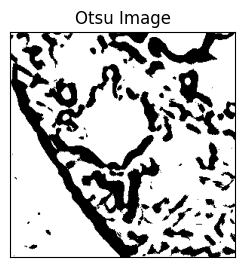

In [8]:
image = cv.imread(IMAGE_FILE)
otsu = get_otsu(image)
ada_th = fast_nlmean_denoiser(image)
#fast_nl_mean_and_otsu = get_otsu(ada_th)

plt.subplot(121),plt.imshow(otsu,cmap = 'gray')
plt.title('Otsu Image'), plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(ada_th,cmap = 'gray')
#plt.title('Fast NlMean'), plt.xticks([]), plt.yticks([])
# plt.subplot(122),plt.imshow(fast_nl_mean_and_otsu,cmap = 'gray')
# plt.title('Fast NlMean + Otsu'), plt.xticks([]), plt.yticks([])
plt.show()

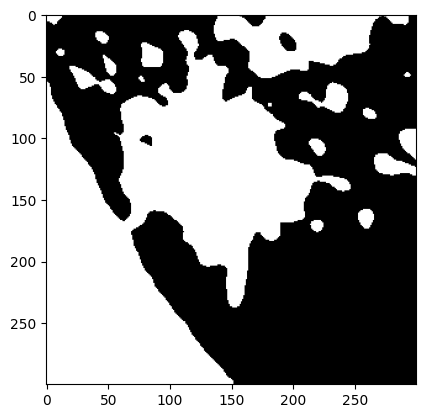

In [9]:
# apply threshold to image and plot
th = threshold(image, 100)
plt.imshow(th, cmap='gray')
plt.show()

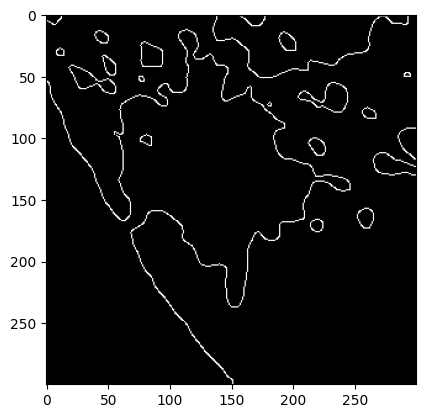

In [10]:
# apply canny to thresholded image and plot
edges = cv.Canny(th, 128, 200)
plt.imshow(edges, cmap='gray')
plt.show()

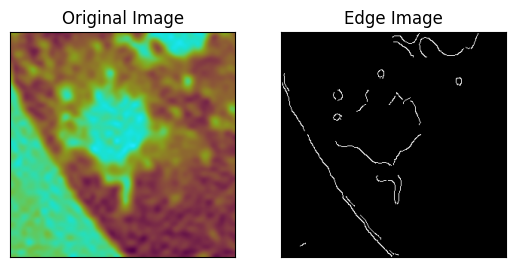

In [11]:
img, edges = extract_borders(IMAGE_FILE, False)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

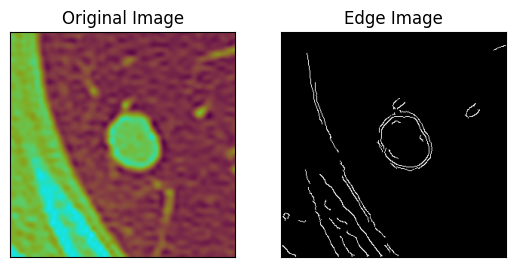

In [12]:
img_file = path_join(PATCHES_FOLDER, "candidate_other_0.png")
img, edges = extract_borders(img_file, False)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [17]:
def remove_all_edges():
    import os

    for f in os.listdir(PATCHES_FOLDER):
        if f.endswith("_edges.png"):
            os.remove(path_join(PATCHES_FOLDER, f))
            

In [30]:
# do the same as above applying threshold and canny
from fix_imports import fix_relative_imports
fix_relative_imports()
image_files = []
# get all images from extracted_patches folder
# list all files in extracted patches folder
import os

from input_image_generator.generator import InputImageGenerator

input_image_generator = InputImageGenerator()

input_image = input_image_generator.generate_input_image()

for f in os.listdir(PATCHES_FOLDER):
    if f.endswith(".png"):
        image_files.append(path_join(PATCHES_FOLDER, f))
        
for img_file in image_files:
    img = cv.imread(img_file)
    input_image = input_image_generator.generate_input_image(img)
    #th = threshold(img, 100)
    #edges = cv.Canny(th, 128, 200)
    # plot with color map of white and black
     
    plt.imshow(input_image, cmap='gray_r')
    plt.show()
    #plt.imsave(img_file.replace(".png", "_edges.png"), edges, cmap='gray_r')
    
    # show the original image
    plt.imshow(img)
    plt.show()


ImportError: attempted relative import with no known parent package